In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
NHANES = pd.read_csv('NHANES.csv')

## Health Status and Income

In [81]:
#Crosstabulation of health status and income
income_category = pd.crosstab(index=NHANES['HHIncome'], columns=NHANES['HealthGen'])

In [82]:
#Get percentages of each health status
income_category['poor_per'] = income_category['Poor'] / sum(income_category['Poor'])
income_category['fair_per'] = income_category['Fair'] / sum(income_category['Fair'])
income_category['good_per'] = income_category['Good'] / sum(income_category['Good'])
income_category['vgood_per'] = income_category['Vgood'] / sum(income_category['Vgood'])
income_category['excellent_per'] = income_category['Excellent'] / sum(income_category['Excellent'])

health_income = income_category[['poor_per','fair_per','good_per','vgood_per','excellent_per']]

In [83]:
#Convert the table to a CSV file
health_income.to_csv('Income_Health_Table.csv')

In [26]:
#Read the new CSV file and drop NANs in the income column
income_health = pd.read_csv('Income_Health_Table.csv')
income_health = income_health.dropna(subset=['HHIncome'])

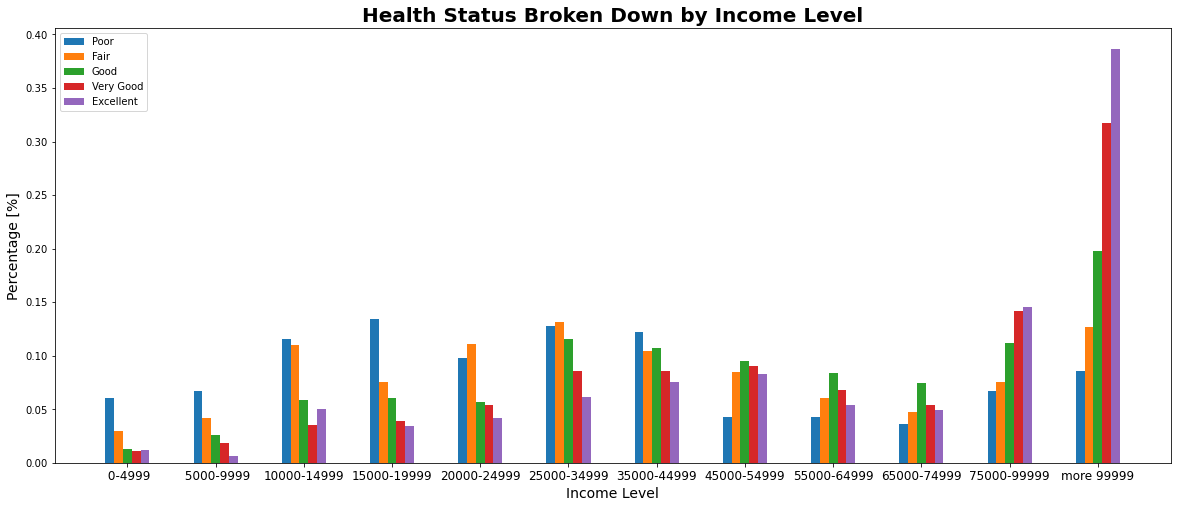

In [84]:
#Generates a grouped bar plot showing health status broken down by income level
labels = income_health['HHIncome'] 
y_value1 = income_health['poor_per'] 
y_value2 = income_health['fair_per'] 
y_value3 = income_health['good_per'] 
y_value4 = income_health['vgood_per'] 
y_value5 = income_health['excellent_per']


x = np.arange(len(labels))
width = 0.1  

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x, y_value1, width, label='Poor')
ax.bar(x + width, y_value2, width, label='Fair')
ax.bar(x + 2 * width, y_value3, width, label='Good') 
ax.bar(x + 3 * width, y_value4, width, label='Very Good') 
ax.bar(x + 4 * width, y_value5, width, label='Excellent') 

ax.set_ylabel('Percentage [%]', fontsize=14)
ax.set_xlabel('Income Level', fontsize=14)
ax.set_title('Health Status Broken Down by Income Level',fontsize=20, fontweight='bold')
ax.set_xticks(x + (4*width)/2)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()


plt.show()

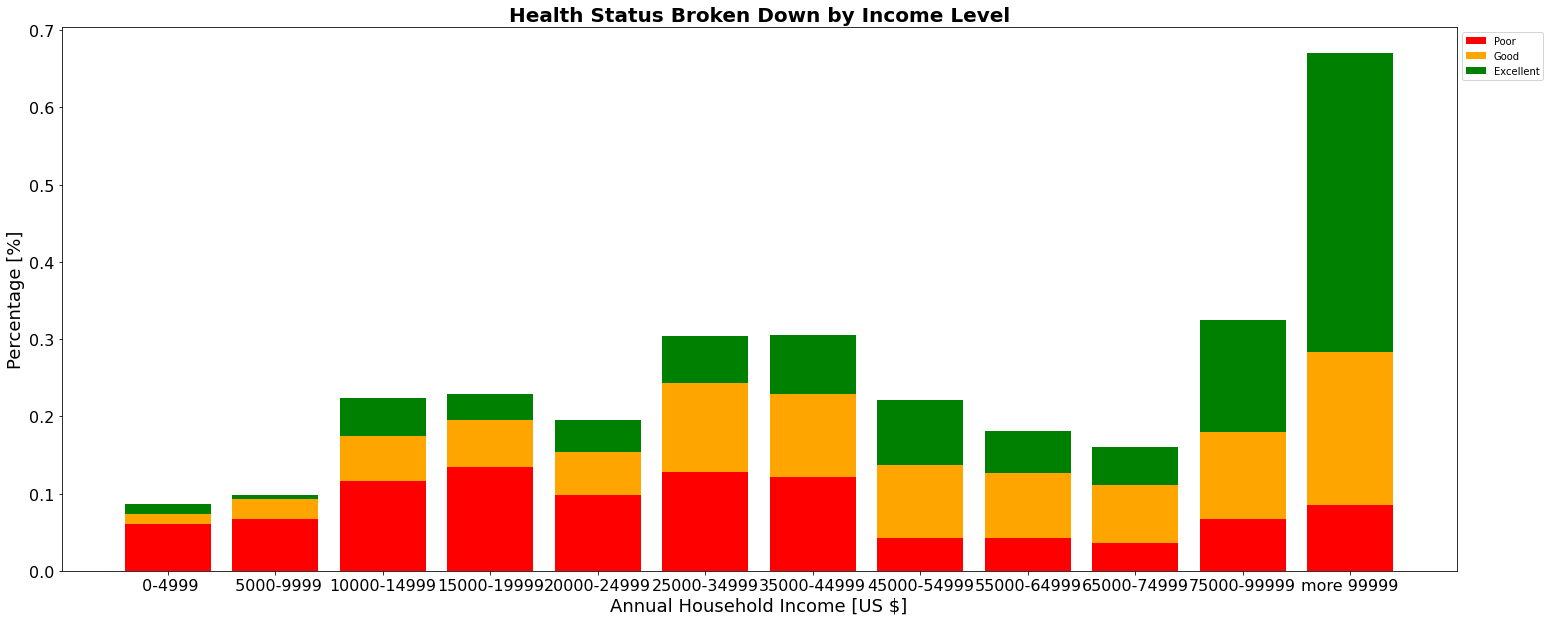

In [85]:
#Generates a stacked bar plot showing health status by income level
labels = income_health['HHIncome'] 
y_value1 = income_health['poor_per'] 
y_value2 = income_health['good_per'] 
y_value5 = income_health['excellent_per']

fig, axs = plt.subplots(figsize=(25,10))    

p1 = axs.bar(labels, y_value1, color='red')
p2 = axs.bar(labels, y_value2, bottom=y_value1, color='orange')
p3 = axs.bar(labels, y_value5, bottom=(y_value1+y_value2), color='green')


axs.set_title("Health Status Broken Down by Income Level", fontsize=20, fontweight="bold")   
axs.set_xlabel("Annual Household Income [US $]", fontsize=18)
axs.set_ylabel("Percentage [%]", fontsize=18)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0]),['Poor','Good','Excellent'],
           bbox_to_anchor=(1, 1))

plt.show() 

## Health Status and Education

In [78]:
#New dataframe dropping NANs from Age, Race, Education, and HealthGen columns
education = NHANES[['Age', 'Race3', 'Education', 'HealthGen']].dropna()

In [79]:
#Crosstabulation of health status and education level
edu = pd.crosstab(index=education['HealthGen'], columns=education['Education'])

In [80]:
#Add percentages of each education level
edu['8th Grade_per'] = edu['8th Grade'] / sum(edu['8th Grade'])
edu['9 - 11th Grade_per'] = edu['9 - 11th Grade'] / sum(edu['9 - 11th Grade'])
edu['High School_per'] = edu['High School'] / sum(edu['High School'])
edu['Some College_per'] = edu['Some College'] / sum(edu['Some College'])
edu['College Grad_per'] = edu['College Grad'] / sum(edu['College Grad'])

health_ed = edu[['8th Grade_per','9 - 11th Grade_per','High School_per','Some College_per','College Grad_per']]

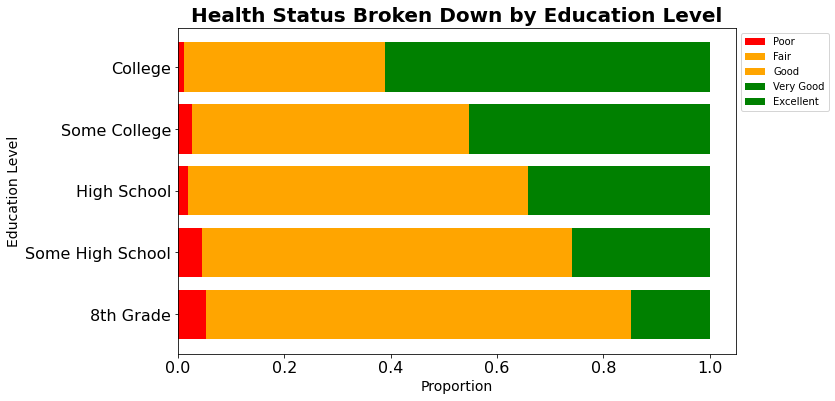

In [86]:
#Generates a stacked horizontal bar plot showing health status  broken down by education level
label = ['8th Grade', 'Some High School', 'High School', 'Some College', 'College']
y_value1 = health_ed.loc['Poor']
y_value2 = health_ed.loc['Fair']
y_value3 = health_ed.loc['Good']
y_value4 = health_ed.loc['Vgood']
y_value5 = health_ed.loc['Excellent']

fig, axs = plt.subplots(figsize=(10,6))    

p1 = axs.barh(label, y_value1, color='red'),      
p2 = axs.barh(label, y_value2, left=y_value1, color='orange'), 
p3 = axs.barh(label, y_value3, left=(y_value1+y_value2), color='orange'), 
p4 = axs.barh(label, y_value4, left=(y_value1+y_value2+y_value3), color='green'), 
p5 = axs.barh(label, y_value5, left=(y_value1+y_value2+y_value3+y_value4), color='green'), 

axs.set_title("Health Status Broken Down by Education Level", fontsize=20, fontweight="bold")   
axs.set_xlabel("Proportion", fontsize=14)
axs.set_ylabel("Education Level", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),['Poor','Fair','Good','Very Good','Excellent'],
           bbox_to_anchor=(1, 1))

plt.show()

## Health Status and Race

In [76]:
#Crosstabulation of Health Status and Race
health = pd.crosstab(index=NHANES['HealthGen'], columns=NHANES['Race3'])
health

Race3,Asian,Black,Hispanic,Mexican,Other,White
HealthGen,,,,,,
Excellent,28,45,23,24,15,351
Fair,17,74,49,70,13,249
Good,90,168,103,136,42,946
Poor,6,17,7,11,1,35
Vgood,68,113,52,72,36,937


In [77]:
#Get percentages of each race
health['Asian_per'] = health['Asian'] / sum(health['Asian'])
health['Black_per'] = health['Black'] / sum(health['Black'])
health['Hispanic_per'] = health['Hispanic'] / sum(health['Hispanic'])
health['Mexican_per'] = health['Mexican'] / sum(health['Mexican'])
health['Other_per'] = health['Other'] / sum(health['Other'])
health['White_per'] = health['White'] / sum(health['White'])
health_race = health[['Asian_per','Black_per','Hispanic_per','Mexican_per','Other_per','White_per']]

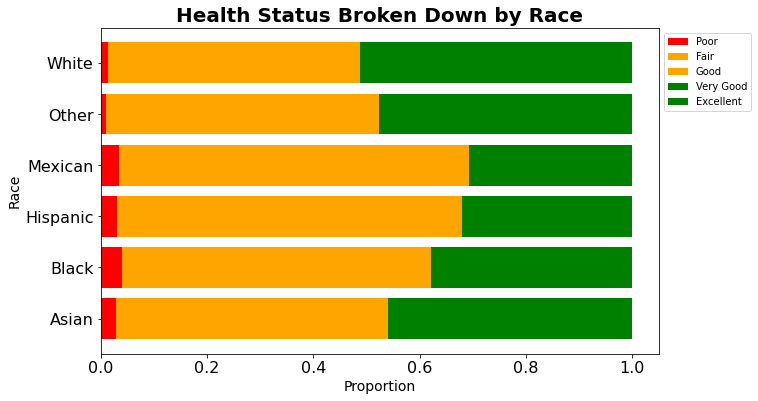

In [87]:
#Generates a stacked horizontal bar plot showing health status  broken down by race
import matplotlib.pyplot as plt

label = ['Asian', 'Black', 'Hispanic', 'Mexican', 'Other', 'White']
y_value1 = health_race.loc['Poor']
y_value2 = health_race.loc['Fair']
y_value3 = health_race.loc['Good']
y_value4 = health_race.loc['Vgood']
y_value5 = health_race.loc['Excellent']

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here    

p1 = axs.barh(label, y_value1, color='red'),      
p2 = axs.barh(label, y_value2, left=y_value1, color='orange'), 
p3 = axs.barh(label, y_value3, left=(y_value1+y_value2), color='orange'), 
p4 = axs.barh(label, y_value4, left=(y_value1+y_value2+y_value3), color='green'), 
p5 = axs.barh(label, y_value5, left=(y_value1+y_value2+y_value3+y_value4), color='green'), 

axs.set_title("Health Status Broken Down by Race", fontsize=20, fontweight="bold")   
axs.set_xlabel("Proportion", fontsize=14)
axs.set_ylabel("Race", fontsize=14)
axs.tick_params(labelsize=16)  
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),['Poor','Fair','Good','Very Good','Excellent'],
           bbox_to_anchor=(1, 1))

plt.show() 

## Income and Race

In [67]:
#New dataframe dropping NANs from the income column
income_df = NHANES.dropna(subset=['HHIncomeMid'])

In [68]:
#Separating income by race and age
white = income_df['Race3'] == 'White'
black = income_df['Race3'] == 'Black'
mexican = income_df['Race3'] == 'Mexican'
hispanic = income_df['Race3'] == 'Hispanic'
asian = income_df['Race3'] == 'Asian'
other = income_df['Race3'] == 'Other'
adult = income_df['Age'] >= 20

In [69]:
#Creating new dataframes based on race and age criteria
white_df = income_df[white & adult]
black_df = income_df[black & adult]
mexican_df = income_df[mexican & adult]
hispanic_df = income_df[hispanic & adult]
asian_df = income_df[asian & adult]
other_df = income_df[other & adult]

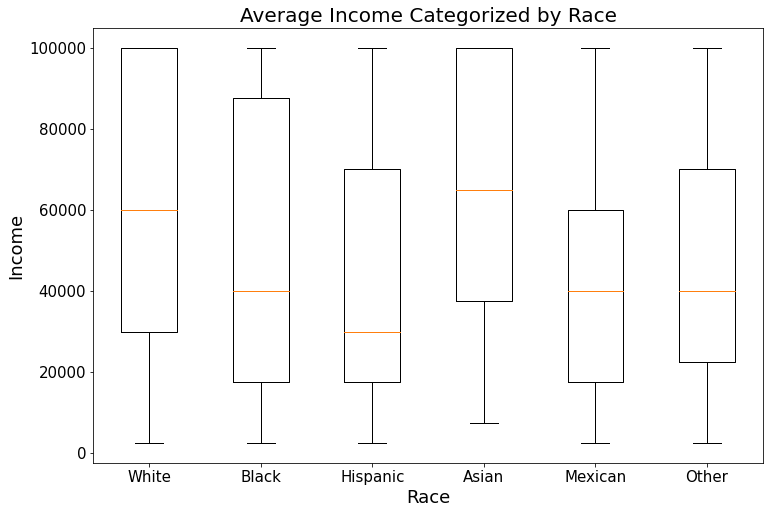

In [70]:
#Generate a grouped boxplot that shows differences across average income by race
fig, axs=plt.subplots(figsize=(12,8))
axs.boxplot([white_df['HHIncomeMid'], black_df['HHIncomeMid'],
             hispanic_df['HHIncomeMid'], asian_df['HHIncomeMid'],
            mexican_df['HHIncomeMid'],other_df['HHIncomeMid']])
plt.title('Average Income Categorized by Race', fontsize=20)
axs.set_xticklabels(['White', 'Black', 'Hispanic', 'Asian',
                    'Mexican','Other'])
axs.set_ylabel('Income', fontsize=18)
axs.set_xlabel('Race', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

## Poverty and Race

In [71]:
#New dataframe dropping NANs from the poverty column
poverty_df = NHANES.dropna(subset=['Poverty'])

In [72]:
#Separating poverty by race and age
white = poverty_df['Race3'] == 'White'
black = poverty_df['Race3'] == 'Black'
mexican = poverty_df['Race3'] == 'Mexican'
hispanic = poverty_df['Race3'] == 'Hispanic'
asian = poverty_df['Race3'] == 'Asian'
other = poverty_df['Race3'] == 'Other'
adult = poverty_df['Age'] >= 20

In [73]:
#Creating new dataframes based on race and age criteria
white_poverty = poverty_df[white & adult]
black_poverty = poverty_df[black & adult]
mexican_poverty = poverty_df[mexican & adult]
hispanic_poverty = poverty_df[hispanic & adult]
asian_poverty = poverty_df[asian & adult]
other_poverty = poverty_df[other & adult]

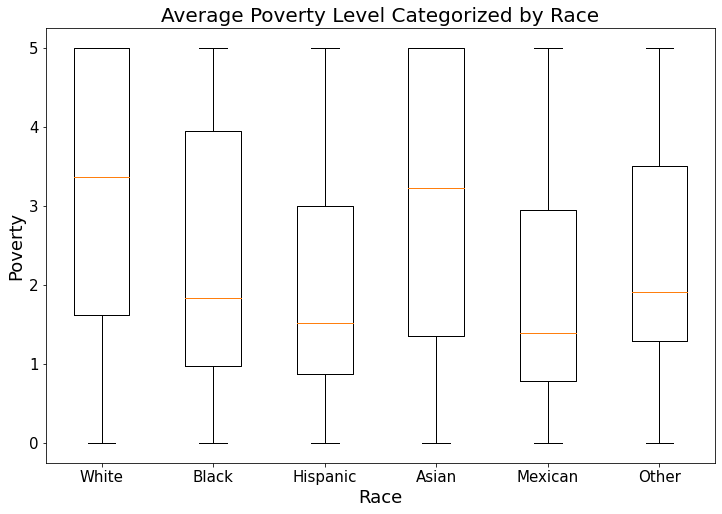

In [74]:
#Generates a grouped boxplot that shows differences across average poverty level by race
fig, axs=plt.subplots(figsize=(12,8))
axs.boxplot([white_poverty['Poverty'], black_poverty['Poverty'],
             hispanic_poverty['Poverty'], asian_poverty['Poverty'],
            mexican_poverty['Poverty'],other_poverty['Poverty']])
plt.title('Average Poverty Level Categorized by Race', fontsize=20)
axs.set_xticklabels(['White', 'Black', 'Hispanic', 'Asian',
                    'Mexican','Other'])
axs.set_ylabel('Poverty', fontsize=18)
axs.set_xlabel('Race', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

## Poverty and Health (Scatter Plots)

In [88]:
#Create new dataframe dropping the NANs from the DaysPhysHlthBad, DaysMentHlthBad,
#Income, and Povety columns
health_df = NHANES.dropna(subset=['DaysPhysHlthBad', 'DaysMentHlthBad', 'HHIncomeMid', 'Poverty'])

In [89]:
#Separating results by race and age
white = health_df['Race3'] == 'White'
black = health_df['Race3'] == 'Black'
adult = health_df['Age'] >= 20

In [90]:
#New dataframes based on race and age criteria
white_health = health_df[white & adult]
black_health = health_df[black & adult]

In [109]:
##Mental Health and Poverty

In [91]:
#Get results from linear regression for the relationship between mental health status and poverty for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = white_health['DaysMentHlthBad'].values
y_vals = white_health['Poverty']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     87.37
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.23e-20
Time:                        11:40:18   Log-Likelihood:                -3923.7
No. Observations:                2089   AIC:                             7851.
Df Residuals:                    2087   BIC:                             7863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3493      0.039     85.887      0.000       3.273       3.426
x1            -0.0423      0.005     -9.347      0.000      -0.051      -0.033
==============================================================================
Omnibus:                     4724.783   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.865
Skew:                          -0.217   Prob(JB):                     1.17e-35
Kurtosis:                       1.712   Cond. No.                         9.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Get b0, b1, and x_plot from regression results of mental health status and poverty for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(white_health['DaysMentHlthBad']), np.max(white_health['DaysMentHlthBad']), 100) 

In [100]:
#Get results from linear regression for the relationship between mental health status and poverty for black adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals_1 = black_health['DaysMentHlthBad'].values
y_vals_1 = black_health['Poverty']

reg_model_1 = OLS(y_vals_1, sm.add_constant(x_vals_1)).fit()
display(reg_model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.607
Date:                Thu, 17 Dec 2020   Prob (F-statistic):              0.206
Time:                        11:44:37   Log-Likelihood:                -561.36
No. Observations:                 294   AIC:                             1127.
Df Residuals:                     292   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5075      0.105     23.868      0.000       2.301       2.714
x1            -0.0164      0.013     -1.268      0.206      -0.042       0.009
==============================================================================
Omnibus:                      263.628   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.424
Skew:                           0.307   Prob(JB):                     4.97e-06
Kurtosis:                       1.729   Cond. No.                         8.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#Get b0, b1, and x_plot from regression results of mental health status and poverty for black adults
b0_1 = reg_model_1.params[0]
b1_1 = reg_model_1.params[1]
x_plot_1 = np.linspace(np.min(black_health['DaysMentHlthBad']), np.max(black_health['DaysMentHlthBad']), 100) 

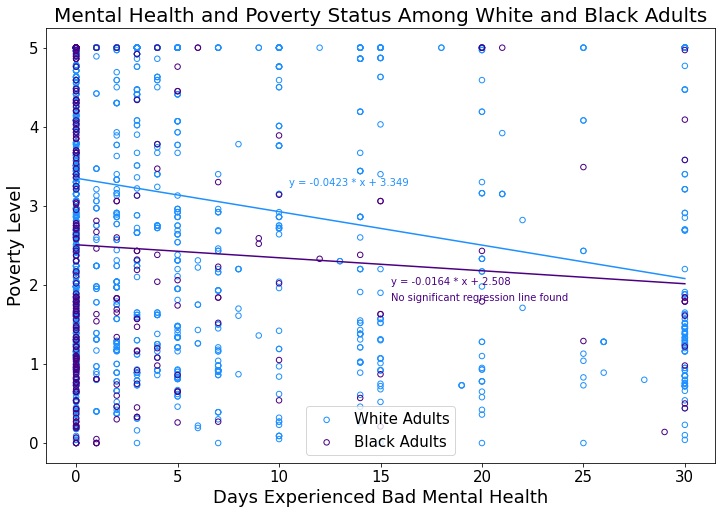

In [102]:
#Scatter plot comparing poverty vs. mental health status between white and black adults
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(white_health['DaysMentHlthBad'], white_health['Poverty'], c='none', edgecolors='dodgerblue', s=30, label='White Adults')
axs.scatter(black_health['DaysMentHlthBad'], black_health['Poverty'],c='none', edgecolors='indigo', s=30, label='Black Adults')
plt.title("Mental Health and Poverty Status Among White and Black Adults", fontsize=20)
axs.set_xlabel("Days Experienced Bad Mental Health", fontsize=18)
axs.set_ylabel("Poverty Level", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='dodgerblue')
axs.plot(x_plot_1, x_plot_1*b1_1 + b0_1, color='indigo')
plt.text(10.5, 3.25, "y = -0.0423 * x + 3.349", color='dodgerblue')
plt.text(15.5, 2, "y = -0.0164 * x + 2.508", color='indigo')
plt.text(15.5, 1.8, 'No significant regression line found', color='indigo')
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [108]:
##Phyiscal Health and Poverty

In [103]:
#Get results from linear regression for the relationship between physical health status and poverty for white adults
x_vals_2 = white_health['DaysPhysHlthBad'].values
y_vals_2 = white_health['Poverty']

reg_model_2 = OLS(y_vals_2, sm.add_constant(x_vals_2)).fit()
display(reg_model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     40.68
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.20e-10
Time:                        11:45:08   Log-Likelihood:                -3946.4
No. Observations:                2089   AIC:                             7897.
Df Residuals:                    2087   BIC:                             7908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2795      0.038     85.822      0.000       3.205       3.354
x1            -0.0318      0.005     -6.378      0.000      -0.042      -0.022
==============================================================================
Omnibus:                    78020.639   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.820
Skew:                          -0.252   Prob(JB):                     3.30e-40
Kurtosis:                       1.646   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#Get b0, b1, and x_plot from regression results of physical health status and poverty for white adults
b0_2 = reg_model_2.params[0]
b1_2 = reg_model_2.params[1]
x_plot_2 = np.linspace(np.min(white_health['DaysPhysHlthBad']), np.max(white_health['DaysPhysHlthBad']), 100) 

In [105]:
#Get results from linear regression for the relationship between physical health status and poverty for black adults
x_vals_3 = black_health['DaysPhysHlthBad'].values
y_vals_3 = black_health['Poverty']

reg_model_3 = OLS(y_vals_3, sm.add_constant(x_vals_3)).fit()
display(reg_model_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.342
Date:                Thu, 17 Dec 2020   Prob (F-statistic):              0.127
Time:                        11:45:28   Log-Likelihood:                -560.99
No. Observations:                 294   AIC:                             1126.
Df Residuals:                     292   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5164      0.104     24.136      0.000       2.311       2.722
x1            -0.0184      0.012     -1.530      0.127      -0.042       0.005
==============================================================================
Omnibus:                      255.002   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.170
Skew:                           0.303   Prob(JB):                     5.64e-06
Kurtosis:                       1.733   Cond. No.                         9.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
#Get b0, b1, and x_plot from regression results of phyiscal health status and poverty for black adults
b0_3 = reg_model_3.params[0]
b1_3 = reg_model_3.params[1]
x_plot_3 = np.linspace(np.min(black_health['DaysPhysHlthBad']), np.max(black_health['DaysPhysHlthBad']), 100) 

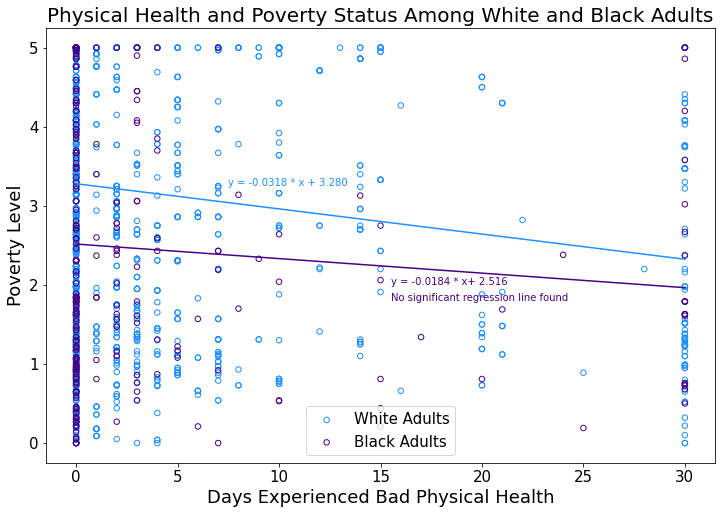

In [107]:
#Scatter plot comparing poverty vs. physical health status between white and black adults
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(white_health['DaysPhysHlthBad'], white_health['Poverty'], c='none', edgecolors='dodgerblue', s=30, label='White Adults')
axs.scatter(black_health['DaysPhysHlthBad'], black_health['Poverty'],c='none', edgecolors='indigo', s=30, label='Black Adults')
plt.title("Physical Health and Poverty Status Among White and Black Adults", fontsize=20)
axs.set_xlabel("Days Experienced Bad Physical Health", fontsize=18)
axs.set_ylabel("Poverty Level", fontsize=18)
axs.plot(x_plot_2, x_plot_2*b1_2 + b0_2, color='dodgerblue')
axs.plot(x_plot_3, x_plot_3*b1_3 + b0_3, color='indigo')
plt.text(7.5, 3.25, "y = -0.0318 * x + 3.280", color='dodgerblue')
plt.text(15.5, 2, "y = -0.0184 * x+ 2.516", color='indigo')
plt.text(15.5, 1.8, 'No significant regression line found', color='indigo')
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

## Income and Health (Scatter Plots)

In [110]:
#Get results from linear regression for the relationship between mental health status and income for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals_4 = white_health['HHIncomeMid'].values
y_vals_4 = white_health['DaysMentHlthBad']

reg_model_4 = OLS(y_vals_4, sm.add_constant(x_vals_4)).fit()
display(reg_model_4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DaysMentHlthBad   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     30.79
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           3.24e-08
Time:                        11:46:31   Log-Likelihood:                -7201.2
No. Observations:                2089   AIC:                         1.441e+04
Df Residuals:                    2087   BIC:                         1.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7009      0.356     16.003      0.000       5.002       6.399
x1         -2.815e-05   5.07e-06     -5.549      0.000   -3.81e-05   -1.82e-05
==============================================================================
Omnibus:                      951.519   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3681.158
Skew:                           2.312   Prob(JB):                         0.00
Kurtosis:                       7.572   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#Get b0, b1, and x_plot from regression results of mental health status and income for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

b0_4 = reg_model_4.params[0]
b1_4 = reg_model_4.params[1]
x_plot_4 = np.linspace(np.min(white_health['HHIncomeMid']), np.max(white_health['HHIncomeMid']), 100) 

In [111]:
#Get results from linear regression for the relationship between mental health status and income for black adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals_5 = black_health['HHIncomeMid'].values
y_vals_5 = black_health['DaysMentHlthBad']

reg_model_5 = OLS(y_vals_5, sm.add_constant(x_vals_5)).fit()
display(reg_model_5.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DaysMentHlthBad   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.845
Date:                Thu, 17 Dec 2020   Prob (F-statistic):             0.0927
Time:                        11:46:45   Log-Likelihood:                -1003.1
No. Observations:                 294   AIC:                             2010.
Df Residuals:                     292   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4249      0.760      5.823      0.000       2.929       5.920
x1         -2.211e-05   1.31e-05     -1.687      0.093   -4.79e-05    3.69e-06
==============================================================================
Omnibus:                      172.625   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              788.009
Skew:                           2.629   Prob(JB):                    7.69e-172
Kurtosis:                       9.056   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#Get b0, b1, and x_plot from regression results of mental health status and income for black adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

b0_5 = reg_model_5.params[0]
b1_5 = reg_model_5.params[1]
x_plot_5 = np.linspace(np.min(black_health['HHIncomeMid']), np.max(black_health['HHIncomeMid']), 100) 

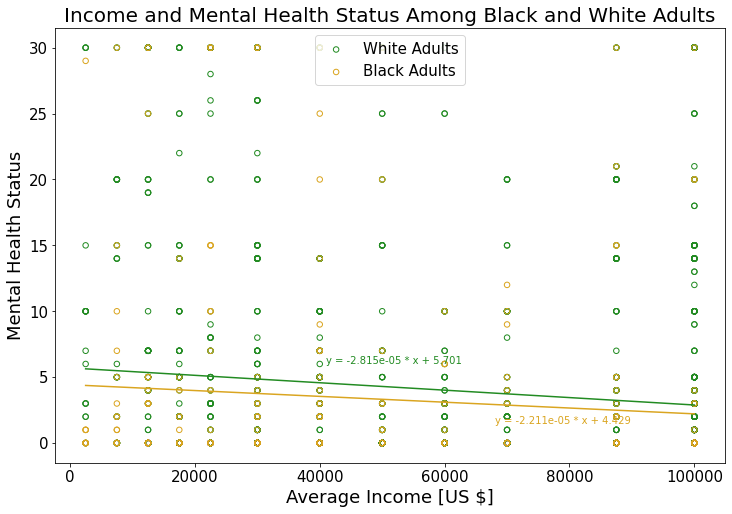

In [113]:
#Scatter plot comparing income vs. mental health status between white and black adults
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(white_health['HHIncomeMid'], white_health['DaysMentHlthBad'], c='none', edgecolors='forestgreen', s=30, label='White Adults')
axs.scatter(black_health['HHIncomeMid'], black_health['DaysMentHlthBad'], c='none', edgecolors='goldenrod', s=30, label='Black Adults')
plt.title("Income and Mental Health Status Among Black and White Adults", fontsize=20)
axs.set_xlabel("Average Income [US $]", fontsize=18)
axs.set_ylabel("Mental Health Status", fontsize=18)
axs.plot(x_plot_4, x_plot_4*b1_4 + b0_4, color='forestgreen')
axs.plot(x_plot_5, x_plot_5*b1_5 + b0_5, color='goldenrod')
plt.text(41000, 6, "y = -2.815e-05 * x + 5.701", color='forestgreen')
plt.text(68000, 1.5, "y = -2.211e-05 * x + 4.429", color='goldenrod')
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [114]:
#Get results from linear regression for the relationship between physical health status and income for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals_6 = white_health['HHIncomeMid'].values
y_vals_6 = white_health['DaysPhysHlthBad']

reg_model_6 = OLS(y_vals_6, sm.add_constant(x_vals_6)).fit()
display(reg_model_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DaysPhysHlthBad   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     54.74
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.99e-13
Time:                        11:47:00   Log-Likelihood:                -7007.5
No. Observations:                2089   AIC:                         1.402e+04
Df Residuals:                    2087   BIC:                         1.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1834      0.325     15.964      0.000       4.547       5.820
x1         -3.421e-05   4.62e-06     -7.398      0.000   -4.33e-05   -2.51e-05
==============================================================================
Omnibus:                     1202.701   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7471.267
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      10.378   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#Get b0, b1, and x_plot from regression results of physical health status and income for white adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

b0_6 = reg_model_6.params[0]
b1_6 = reg_model_6.params[1]
x_plot_6 = np.linspace(np.min(white_health['HHIncomeMid']), np.max(white_health['HHIncomeMid']), 100) 

In [116]:
#Get results from linear regression for the relationship between physical health status and income for black adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals_7 = black_health['HHIncomeMid'].values
y_vals_7 = black_health['DaysPhysHlthBad']

reg_model_7 = OLS(y_vals_7, sm.add_constant(x_vals_7)).fit()
display(reg_model_7.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DaysPhysHlthBad   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.410
Date:                Thu, 17 Dec 2020   Prob (F-statistic):             0.0658
Time:                        11:47:12   Log-Likelihood:                -1024.9
No. Observations:                 294   AIC:                             2054.
Df Residuals:                     292   BIC:                             2061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7397      0.818      5.793      0.000       3.129       6.350
x1         -2.606e-05   1.41e-05     -1.847      0.066   -5.38e-05    1.71e-06
==============================================================================
Omnibus:                      168.583   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.291
Skew:                           2.597   Prob(JB):                    1.75e-156
Kurtosis:                       8.620   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
#Get b0, b1, and x_plot from regression results of physical health status and income for black adults
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

b0_7 = reg_model_7.params[0]
b1_7 = reg_model_7.params[1]
x_plot_7 = np.linspace(np.min(black_health['HHIncomeMid']), np.max(black_health['HHIncomeMid']), 100) 

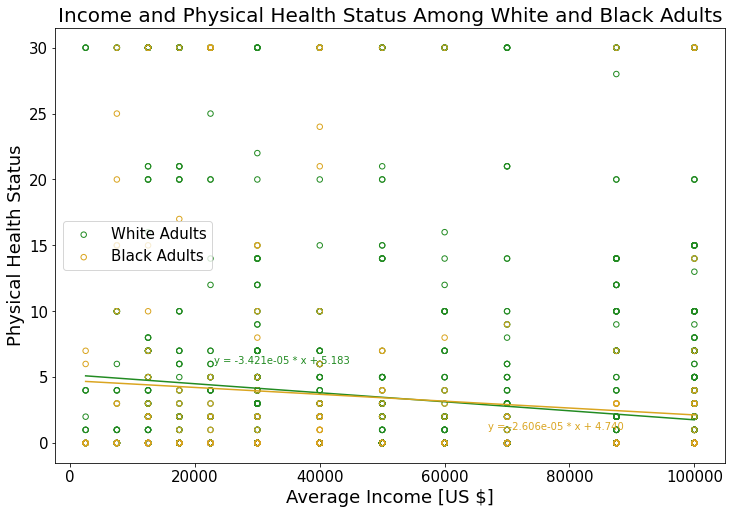

In [118]:
#Scatter plot comparing income vs. physical health status between white and black adults
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(white_health['HHIncomeMid'], white_health['DaysPhysHlthBad'], c='none', edgecolors='forestgreen', s=30, label='White Adults')
axs.scatter(black_health['HHIncomeMid'], black_health['DaysPhysHlthBad'], c='none', edgecolors='goldenrod', s=30, label='Black Adults')
plt.title("Income and Physical Health Status Among White and Black Adults", fontsize=20)
axs.set_xlabel("Average Income [US $]", fontsize=18)
axs.set_ylabel("Physical Health Status", fontsize=18)
axs.plot(x_plot_6, x_plot_6*b1_6 + b0_6, color='forestgreen')
axs.plot(x_plot_7, x_plot_7*b1_7 + b0_7, color='goldenrod')
plt.text(23000, 6, "y = -3.421e-05 * x + 5.183", color='forestgreen')
plt.text(67000, 1, "y = -2.606e-05 * x + 4.740", color='goldenrod')
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()